In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acc_df = pd.read_csv('../acc_per_group.csv', decimal=',', delimiter=';')
acc_df["Method"].unique()
acc_df["total count"] = acc_df["train count"] + acc_df["test count"]
acc_df["accuracy"] = acc_df['A@10'] * 100
acc_df['gini'].unique()
acc_df = acc_df[acc_df['imbalance'] == 'normal']
acc_df = acc_df[((acc_df['p'] == 0.8) & (acc_df['gini'] == 0.4)) | (acc_df['gini'] ==-1)]
acc_df[acc_df["Method"] == "SPH+CPI"]
#acc_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../acc_per_group.csv'

In [4]:
# look where accuracy for more than 22 samples per group and lesseq than 22 samples per group
acc_lower_22 = acc_df[acc_df["total count"]>22]
acc_lower_22['acc count'] = acc_lower_22['accuracy'] * acc_lower_22['test count']
acc_lower_22.groupby(['Method'])['acc count'].sum() * 4/acc_lower_22['test count'].sum()

#acc_df['n_correct_predicted'] = acc_df['accuracy'] *acc_df['test count'] /100
#acc_df.groupby(['Method'])['n_correct_predicted'].sum()* 4/acc_df['test count'].sum()
#acc_df.groupby(['Method'])['total count'].median()

<ipython-input-4-1a654b8d9f96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_lower_22['acc count'] = acc_lower_22['accuracy'] * acc_lower_22['test count']


Method
RF+B    190.845470
SPH     130.546624
Name: acc count, dtype: float64

In [5]:
acc_lower_22 = acc_df[acc_df["total count"]<=22]
acc_lower_22['acc count'] = acc_lower_22['accuracy'] * acc_lower_22['test count']
acc_lower_22.groupby(['Method'])['acc count'].sum() * 4/acc_lower_22['test count'].sum()

<ipython-input-5-5c14bd8afebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_lower_22['acc count'] = acc_lower_22['accuracy'] * acc_lower_22['test count']


Method
RF+B    150.444225
SPH     123.790721
Name: acc count, dtype: float64

### Now we do the same for the AVG A@e

In [6]:
acc_lower_22 = acc_df
acc_lower_22['acc count'] = acc_lower_22['Avg A@e'] * acc_lower_22['test count']
acc_lower_22.groupby(['Method'])['acc count'].sum() * 4/acc_lower_22['test count'].sum()

Method
RF+B    1.459270
SPH     1.109492
Name: acc count, dtype: float64

In [7]:
acc_lower_22 = acc_df[acc_df["total count"]<=22]
acc_lower_22['acc count'] = acc_lower_22['Avg A@e'] * acc_lower_22['test count']
acc_lower_22.groupby(['Method'])['acc count'].sum() * 4/acc_lower_22['test count'].sum()

<ipython-input-7-934e3c7942fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_lower_22['acc count'] = acc_lower_22['Avg A@e'] * acc_lower_22['test count']


Method
RF+B    1.095755
SPH     1.134255
Name: acc count, dtype: float64

In [9]:
acc_lower_22 = acc_df[acc_df["total count"]>22]
acc_lower_22['acc count'] = acc_lower_22['Avg A@e'] * acc_lower_22['test count']
acc_lower_22.groupby(['Method'])['acc count'].sum() * 4/acc_lower_22['test count'].sum()

<ipython-input-9-f02edc2e4597>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_lower_22['acc count'] = acc_lower_22['Avg A@e'] * acc_lower_22['test count']


Method
RF+B    1.528920
SPH     1.104747
Name: acc count, dtype: float64

## RA@10

In [37]:
ra_df = pd.read_csv('predictions.csv', decimal='.', delimiter=',', index_col=None)
ra_df

,group,target,correct_position,max info loss,Method,Run,gini,p value
0,mde-OM1-6,68,0,0.35,SPH,1,NaN,NaN
1,mde-OM1-6,66,0,0.35,SPH,1,NaN,NaN
2,mde-OM1-4,54,1,0.35,SPH,1,NaN,NaN
3,mde-OM1-4,56,1,0.35,SPH,1,NaN,NaN
4,mde-OM1-4,57,4,0.35,SPH,1,NaN,NaN
...,...,...,...,...,...,...,...,...
1495,hde-OM1-2,4,0,NaN,CPI,1,0.4,0.9
1496,hde-OM2-6,45,2,NaN,CPI,1,0.4,0.9
1497,hde-OM2-6,45,1,NaN,CPI,1,0.4,0.9
1498,hde-OM2-2,30,0,NaN,CPI,1,0.4,0.9


In [12]:
ra_df["correct_position"]

0       0
1       0
2       1
3       1
4       4
       ..
1495    0
1496    2
1497    1
1498    0
1499    9
Name: correct_position, Length: 1500, dtype: int64

In [41]:
def larger_than_median(x):
    return x > 22

result = []
# calculate RA@10 on avgerage
for method in ra_df["Method"].unique():
    method_df = ra_df[ra_df["Method"]== method]
    groups = method_df["group"].unique()
    average_ra = 0
    counter = 0
    
    for group in groups:
        group_df = method_df[method_df["group"] == group]
        
        if larger_than_median(len(group_df)):
            group_df = group_df[group_df["correct_position"] > 0]
            if len(group_df) > 0:
                counter += 1
                ra_for_group = sum(group_df["correct_position"])/len(group_df)
                average_ra += ra_for_group
    
    average_ra = average_ra/counter
    result_for_method = {"Method": method, "RA@10": average_ra}
    result.append(result_for_method)
pd.DataFrame(result)

,Method,RA@10
0,SPH,2.152652
1,SPH+CPI,2.195076
2,RF,2.137121
3,RF+B,2.611111
4,CPI,2.586207


In [42]:
result = []
for method in ra_df["Method"].unique():
    method_df = ra_df[ra_df["Method"]== method]
    method_df = method_df[method_df["correct_position"] > 0]
    average_ra = sum(method_df["correct_position"])/len(method_df)
    result_for_method = {"Method": method, "RA@10": average_ra}
    result.append(result_for_method)
pd.DataFrame(result)

,Method,RA@10
0,SPH,2.412245
1,SPH+CPI,2.378049
2,RF,2.845833
3,RF+B,3.057143
4,CPI,3.628571


Rectangle(xy=(-0.4, 0), width=0.4, height=0, angle=0)
0
0
Rectangle(xy=(0.6, 0), width=0.4, height=16.6667, angle=0)
1
17
Rectangle(xy=(1.6, 0), width=0.4, height=0, angle=0)
0
0
Rectangle(xy=(2.6, 0), width=0.4, height=0, angle=0)
1
0
Rectangle(xy=(3.6, 0), width=0.4, height=16.6667, angle=0)
0
17
Rectangle(xy=(4.6, 0), width=0.4, height=12.5, angle=0)
1
12
Rectangle(xy=(5.6, 0), width=0.4, height=66.6667, angle=0)
0
67
Rectangle(xy=(6.6, 0), width=0.4, height=0, angle=0)
1
0
Rectangle(xy=(7.6, 0), width=0.4, height=33.3333, angle=0)
0
33
Rectangle(xy=(8.6, 0), width=0.4, height=28.5714, angle=0)
1
29
Rectangle(xy=(9.6, 0), width=0.4, height=12.5, angle=0)
0
12
Rectangle(xy=(10.6, 0), width=0.4, height=71.4286, angle=0)
1
71
Rectangle(xy=(11.6, 0), width=0.4, height=57.1429, angle=0)
0
57
Rectangle(xy=(12.6, 0), width=0.4, height=16.6667, angle=0)
1
17
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=0, angle=0)
0
0
Rectangle(xy=(1, 0), width=0.4, height=25, angle=0)
1
25
Rectangle(x

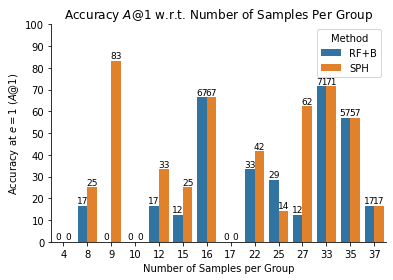

In [16]:
ax = sns.barplot(x="total count", y="accuracy", hue="Method", ci=None, data=acc_df[(acc_df["total count"] <=38) & (acc_df["Method"].isin(["SPH", "RF+B"]))])
ax.set_xlabel('Number of Samples per Group')
ax.set_ylabel(r'Accuracy at $e=1$ ($A@1$)')
ax.set_title('Accuracy $A@1$ w.r.t. Number of Samples Per Group')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_yticks(range(0, 110, 10))

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        las_y = 0
        for i, p in enumerate(ax.patches):
            print(p)
            print(i%2)
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1

            value = '{:.0f}'.format(p.get_height())
            print(value)
            ax.text(_x, _y, value,  {'size': 9}, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

In [46]:
pivot_df = pd.pivot_table(acc_df, values=["accuracy", "total count"], index=["group"], columns="Method")
#sns.barplot(y=acc_df["accuracy"], x=acc_df["group"], hue=acc_df["Method"])
SPH_better_RF = pivot_df[pivot_df["accuracy"]["SPH"] !=pivot_df["accuracy"]["RF+B"]]
#(pivot_df["accuracy"]["SPH+CPI"] * pivot_df["test count"]["SPH+CPI"]).sum()/pivot_df["test count"]["SPH+CPI"].sum()

SPH_better_RF["accuracy"][["SPH", "SPH+CPI", "RF+B"]]

Method,SPH,SPH+CPI,RF+B
group,,,
hde-OM1-2,25.000000,25.000000,0.000000
hde-OM1-4,40.000000,40.000000,20.000000
hde-OM1-6,66.666667,66.666667,33.333333
hde-OM2-1,0.000000,0.000000,7.142857
hde-OM2-3,50.000000,50.000000,0.000000
hde-OM2-5,15.384615,15.384615,7.692308
hde-OM2-6,66.666667,66.666667,0.000000
mde-OM1-2,14.285714,14.285714,0.000000
mde-OM1-3,4.000000,4.000000,12.000000


In [101]:
pivot_df["accuracy"][["SPH", "RF+B", "SPH+CPI"]].median()

Method
SPH        39.130435
RF+B       16.666667
SPH+CPI    39.130435
dtype: float64

In [44]:
pivot_df = pd.pivot_table(acc_df, values=["accuracy", "total count"], index=["group"], columns="Method")

SPH_better_SPH_CPI = pivot_df[pivot_df["accuracy"]["SPH"] < pivot_df["accuracy"]["SPH+CPI"]]
#(pivot_df["accuracy"]["SPH+CPI"] * pivot_df["test count"]["SPH+CPI"]).sum()/pivot_df["test count"]["SPH+CPI"].sum()

SPH_better_SPH_CPI["accuracy"][["SPH", "SPH+CPI"]]

Method,SPH,SPH+CPI
group,,


In [58]:
acc_target_df = pd.read_csv('../acc_per_target.csv', decimal=',', delimiter=';')
acc_target_df["Method"].unique()

array(['SPH+CPI', 'CPI', 'SPH'], dtype=object)

In [63]:
acc_target_df[(acc_target_df["group"] == "mde-OM3-13") & (acc_target_df["Method"] == "SPH")].sort_values(['total count'])

,group,target,accuracy,Method,total count
339,mde-OM3-13,63,0.000000,SPH,2
333,mde-OM3-13,0,0.000000,SPH,3
340,mde-OM3-13,79,0.000000,SPH,4
341,mde-OM3-13,80,0.000000,SPH,4
342,mde-OM3-13,81,0.000000,SPH,4
343,mde-OM3-13,82,0.000000,SPH,4
344,mde-OM3-13,83,0.000000,SPH,4
338,mde-OM3-13,60,0.076923,SPH,33
337,mde-OM3-13,48,0.000000,SPH,35
336,mde-OM3-13,47,0.071429,SPH,45


### SPH better than RF+B

In [25]:
pivot_df = pd.pivot_table(acc_df[acc_df["Method"] != "CPI"], values=["accuracy", "train count"], index=["group"], columns="Method")
pivot_df

accuracy                         train count             
Method           RF+B         SPH     SPH+CPI        RF+B  SPH SPH+CPI
group                                                                 
hde-OM1-2    0.000000   25.000000   25.000000           6    6       6
hde-OM1-3   16.666667   16.666667   16.666667          25   25      25
hde-OM1-4    0.000000    0.000000    0.000000          11   11      11
hde-OM1-5   50.000000   50.000000   50.000000          14   14      14
hde-OM1-6   33.333333   66.666667   66.666667           9    9       9
hde-OM2-1   13.333333    6.666667    6.666667          37   37      37
hde-OM2-2    0.000000    0.000000    0.000000          11   11      11
hde-OM2-3    0.000000   50.000000   50.000000           6    6       6
hde-OM2-5    8.333333    8.333333    8.333333          31   31      31
hde-OM2-6   25.000000   50.000000   50.000000          11   11      11
hde-OM3-1    0.000000   66.666667   66.666667           6    6       6
hde-OM3-3   25.000000   33.333333   33.333333          30   30      30
mde-OM1-2   28.571429   28.571429   28.571429          18   18      18
mde-OM1-3   47.368421   47.368421   47.368421          62   62      62
mde-OM1-4   43.478261   39.130435   39.130435          42   42      42
mde-OM1-5    0.000000    0.000000    0.000000           3    3       3
mde-OM1-6    0.000000    0.000000    0.000000          13   13      13
mde-OM1-7    0.000000  100.000000  100.000000           8    8       8
mde-OM3-11  33.333333    0.000000    0.000000           5    5       5
mde-OM3-12  12.500000   62.500000   62.500000          19   19      19
mde-OM3-13  45.000000   44.000000   55.000000         209  209     209
mde-OM3-4   11.764706   11.764706   11.764706          44   44      44
mde-OM3-5   71.428571   57.142857   57.142857          26   26      26
mde-OM3-6   57.142857   57.142857   57.142857          28   28      28
mde-OM3-7   16.666667   33.333333   33.333333          16   16      16
mde-OM3-8   66.666667   66.666667   66.666667          13   13      13
mde-OM3-9   35.714286   42.857143   42.857143          28   28      28

In [7]:
pivot_df = pd.pivot_table(acc_df[acc_df["Method"].isin( ["SPH", "RF+B"])], values=["accuracy", "total count"], index=["group"], columns="Method")
pivot_df[(pivot_df["accuracy"]["SPH"] == pivot_df["accuracy"]["RF+B"])]

accuracy           total count    
Method         RF+B       SPH        RF+B SPH
group                                        
hde-OM1-2  0.000000  0.000000          10  10
hde-OM1-3  0.166667  0.166667          37  37
hde-OM1-4  0.000000  0.000000          15  15
hde-OM1-5  0.500000  0.500000          22  22
hde-OM2-2  0.000000  0.000000          12  12
hde-OM2-5  0.083333  0.083333          43  43
mde-OM1-3  0.473684  0.473684          81  81
mde-OM1-5  0.000000  0.000000           4   4
mde-OM1-6  0.000000  0.000000          17  17
mde-OM3-4  0.117647  0.117647          61  61
mde-OM3-5  0.714286  0.714286          33  33
mde-OM3-6  0.571429  0.571429          35  35
mde-OM3-8  0.666667  0.666667          16  16

In [8]:
pivot_df[(pivot_df["accuracy"]["SPH"]< pivot_df["accuracy"]["RF+B"])]

accuracy           total count     
Method          RF+B       SPH        RF+B  SPH
group                                          
hde-OM2-1   0.133333  0.066667          52   52
mde-OM1-2   0.285714  0.142857          25   25
mde-OM1-4   0.434783  0.391304          65   65
mde-OM3-11  0.333333  0.000000           8    8
mde-OM3-13  0.450000  0.440000         309  309

In [14]:
pivot_df = pd.pivot_table(acc_df[acc_df["Method"].isin( ["SPH", "RF+B"])], values=["accuracy", "total count"], index=["group"], columns="Method")
mean_samples_group = pivot_df["total count"]["SPH"].median()
pivot_df[(pivot_df["accuracy"]["SPH"] > pivot_df["accuracy"]["RF+B"]) & (pivot_df['total count']['SPH'] <= mean_samples_group)]

accuracy           total count    
Method         RF+B       SPH        RF+B SPH
group                                        
hde-OM1-6  0.333333  0.666667          12  12
hde-OM2-3  0.000000  0.500000           8   8
hde-OM2-6  0.250000  0.500000          15  15
hde-OM3-1  0.000000  0.666667           9   9
mde-OM1-7  0.000000  1.000000           9   9
mde-OM3-7  0.166667  0.333333          22  22

In [58]:
pivot_df[(pivot_df["accuracy"]["SPH"] < pivot_df["accuracy"]["RF+B"])]

accuracy          
Method          RF+B       SPH
group                         
hde-OM2-1   0.244444  0.133333
mde-OM1-2   0.380952  0.190476
mde-OM1-4   0.437500  0.399554
mde-OM3-13  0.415689  0.411116

### SPH + CPI better than SPH

In [45]:
pivot_df = pd.pivot_table(acc_df[acc_df["Method"].isin(["SPH", "SPH+CPI"])], values=["accuracy", "total count"], index=["group", "target"], columns="Method")
pivot_df[pivot_df["accuracy"]["SPH"] < pivot_df["accuracy"]["SPH+CPI"]]

KeyError: 'target'

In [80]:
pivot_df = pd.pivot_table(group_acc_df[group_acc_df["Method"].isin( ["SPH", "SPH+CPI"])], values=["accuracy", "total count"], index=["group"], columns="Method")

In [70]:
pivot_df

accuracy          
Method           SPH   SPH+CPI
group                         
hde-OM1-2   0.046154  0.050000
hde-OM1-3   0.173948  0.174541
hde-OM1-4   0.195266  0.211538
hde-OM1-5   0.490385  0.489583
hde-OM1-6   0.700000  0.700000
hde-OM2-1   0.103825  0.101190
hde-OM2-2   0.000000  0.000000
hde-OM2-3   0.715789  0.724138
hde-OM2-5   0.080247  0.073333
hde-OM2-6   0.664773  0.666667
hde-OM3-1   0.538462  0.527778
hde-OM3-3   0.487562  0.457885
mde-OM1-2   0.205128  0.190476
mde-OM1-3   0.546614  0.435384
mde-OM1-4   0.358322  0.354931
mde-OM1-5   0.000000  0.000000
mde-OM1-6   0.000000  0.000000
mde-OM1-7   0.915493  0.833333
mde-OM3-1   1.000000  0.000000
mde-OM3-11  0.538462  0.500000
mde-OM3-12  0.624542  0.648810
mde-OM3-13  0.403199  0.243449
mde-OM3-4   0.159722  0.161325
mde-OM3-5   0.660355  0.680769
mde-OM3-6   0.592593  0.580247
mde-OM3-7   0.432692  0.431250
mde-OM3-8   0.685897  0.687500
mde-OM3-9   0.553775  0.505401

In [13]:
acc_df[acc_df["Method"] == "SPH+CPI"].sort_values(["accuracy", "train count" ], ascending=[False, True])[0:21]

,group,accuracy,train count,test count,samples per class,n_classes,Method,imbalance,p,gini,Run,target,equal,total count
17,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.95,0.40,1,NaN,NaN,8
73,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.90,0.40,1,NaN,NaN,8
185,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.80,0.40,1,NaN,NaN,8
241,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.75,0.40,1,NaN,NaN,8
297,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.70,0.40,1,NaN,NaN,8
353,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.95,0.35,1,NaN,NaN,8
409,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.90,0.35,1,NaN,NaN,8
521,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.80,0.35,1,NaN,NaN,8
577,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.75,0.35,1,NaN,NaN,8
633,mde-OM3-1,1.0,5,3,2.5,2.0,SPH+CPI,very_high,0.70,0.35,1,NaN,NaN,8


In [17]:
test_df = pd.read_csv('../data_split/test_hardcoded_1.csv', delimiter=';', index_col=None)
test_df

,index,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F99,target,group,level-0,level-1,freq,marker,predicted,accuracy,equal
0,5,NaN,0.000000,0.131656,NaN,NaN,1.528005,NaN,0.708977,0.254809,...,0.416400,52,mde-OM1-3,Engine,mde,19,False,52,1,1
1,219,NaN,NaN,0.633960,0.488546,NaN,1.375720,0.887349,NaN,0.388902,...,0.644739,45,mde-OM3-13,Engine,mde,100,False,45,1,1
2,75,NaN,0.669311,0.191574,0.130598,NaN,1.546475,0.982595,0.592870,0.461258,...,0.230821,47,mde-OM3-13,Engine,mde,100,False,47,1,1
3,24,0.587723,0.538502,0.387446,0.231543,NaN,1.101452,0.552552,0.684311,0.409345,...,0.687839,51,mde-OM3-6,Engine,mde,7,False,50,0,0
4,91,NaN,0.297592,0.726778,0.393702,NaN,1.678367,0.582050,0.433648,0.543413,...,0.483871,45,mde-OM3-13,Engine,mde,100,False,45,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3,0.336141,NaN,0.151848,0.745690,NaN,1.737745,0.753699,NaN,0.291773,...,0.374964,20,hde-OM1-5,Engine,hde,8,False,20,1,1
296,13,0.283823,0.320314,0.484927,0.731674,NaN,1.335625,0.494286,0.799200,0.736492,...,NaN,73,mde-OM3-12,Engine,mde,8,False,45,1,0
297,37,NaN,0.387208,0.506974,0.557979,NaN,1.494377,NaN,0.403423,0.598848,...,0.618411,55,mde-OM1-4,Engine,mde,23,False,55,1,1
298,8,NaN,NaN,0.276312,0.657330,NaN,1.606245,NaN,0.605575,0.347650,...,0.752738,54,mde-OM1-3,Engine,mde,19,False,52,0,0


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Text(0, 0, '53'),
 Text(0, 0, '54'),
 Text(0, 0, '55'),
 Text(0, 0, '56'),
 Text(0, 0, '57'),
 Text(0, 0, '58'),
 Te

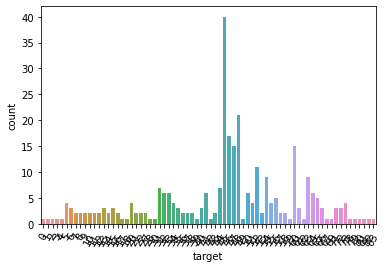

In [21]:
g = sns.countplot(data=test_df, x="target")
g.set_xticklabels(g.get_xticklabels(), rotation=60)